# Исследование признаков - энтропия и фрактальная размерность

В некоторых статьях я читал, что люди использовали информационные признаки для ML моделей в ЭЭГ и конкретно в депрессии

Я провел исследование 3-х признаков

* Sample Entropy
* Higuchi Fractal Dimension
* Katz Fractal Dimension

**Вывод**. Ни один из принзаков не показал стат значимой предиктивной силы

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
data_path = '../../preproc_data/depr/epoch_3'

In [37]:
out_path = '../own_data/200225_entropy_features'

In [5]:
from os import listdir
from os.path import join

In [40]:
from sklearn.metrics import roc_auc_score

In [6]:
path_df = pd.read_csv(join(data_path, 'path_file.csv'))

In [8]:
path_df.head(2)

,fn,target,dataset
0,Sulikova rest 23-06.csv,0,3min
1,Garah rest 17-07.csv,0,3min


In [14]:
df = pd.read_csv(join(data_path, 'Sulikova rest 23-06.csv'), index_col='time')

In [15]:
df.head()

,t6,t4,o1,f8,p4,c4,t3,f7,f3,o2,f4,c3,p3,t5,cz,fp1,fp2,pz,fz
time,,,,,,,,,,,,,,,,,,,
120000,-16387.757812,-21176.552734,-23189.830078,-22838.943359,-5373.981445,-1469.150879,-25845.136719,-25079.152344,-20606.609375,-8784.839844,-24048.212891,-23287.171875,-23115.902344,-23494.306641,0,-25219.712891,-37017.312500,-3532.493896,-4415.171387
120008,-16391.755859,-21174.191406,-23200.812500,-22830.583984,-5373.569824,-1463.972046,-25834.058594,-25064.759766,-20594.587891,-8784.874023,-24031.746094,-23276.179688,-23106.914062,-23487.234375,0,-25209.988281,-37015.937500,-3557.681396,-4402.156250
120016,-16399.234375,-21182.267578,-23191.173828,-22839.974609,-5383.730957,-1474.624268,-25839.472656,-25069.744141,-20603.322266,-8790.706055,-24046.017578,-23288.156250,-23119.037109,-23499.050781,0,-25209.248047,-37022.359375,-3519.205322,-4408.511230
120024,-16388.197266,-21173.396484,-23201.087891,-22832.396484,-5374.493652,-1466.345947,-25829.869141,-25059.431641,-20583.552734,-8779.170898,-24028.033203,-23270.683594,-23103.246094,-23484.609375,0,-25205.902344,-37036.003906,-3569.515381,-4395.576660
120032,-16396.681641,-21184.234375,-23197.767578,-22848.535156,-5382.974121,-1474.350098,-25844.220703,-25073.755859,-20598.197266,-8787.487305,-24041.582031,-23286.470703,-23120.865234,-23501.888672,0,-25207.468750,-37056.425781,-3533.185059,-4407.779785


In [13]:
import mne_features

/Users/ledovsky/anaconda3/lib/python3.7/site-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
df.columns

### Sample Entropy

In [32]:
rows = []
for i, row in path_df.iterrows():
    fn = row['fn']
    df = pd.read_csv(join(data_path, fn), index_col='time')
    res = mne_features.univariate.compute_samp_entropy(df.values.T)
    d = {}
    for i, ch in enumerate(df.columns):
        d[ch + '_samp_entropy'] = res[i]
    for col in ['fn', 'target']:
        d[col] = row[col]
    rows.append(d)
samp_entropy_df = pd.DataFrame(rows)

In [38]:
samp_entropy_df.to_csv(join(out_path, 'samp_entropy.csv'), index=False)

In [41]:
df = samp_entropy_df
res = {}
for col in df.columns:
    if col in ['fn', 'target']:
        continue
    res[col] = roc_auc_score(df['target'], df[col])

In [44]:
pd.Series(res).sort_values(ascending=False)

fz_samp_entropy     0.642929
t5_samp_entropy     0.637879
c3_samp_entropy     0.622222
p3_samp_entropy     0.611616
t3_samp_entropy     0.610606
t6_samp_entropy     0.609091
p4_samp_entropy     0.596465
f3_samp_entropy     0.590404
f7_samp_entropy     0.585859
f4_samp_entropy     0.584848
o1_samp_entropy     0.584343
fp1_samp_entropy    0.575253
pz_samp_entropy     0.571212
c4_samp_entropy     0.568687
t4_samp_entropy     0.558586
f8_samp_entropy     0.545960
o2_samp_entropy     0.523737
fp2_samp_entropy    0.504545
cz_samp_entropy     0.500000
dtype: float64

### Higuchi Fractal Dimension

In [45]:
rows = []
for i, row in path_df.iterrows():
    fn = row['fn']
    df = pd.read_csv(join(data_path, fn), index_col='time')
    res = mne_features.univariate.compute_higuchi_fd(df.values.T)
    d = {}
    for i, ch in enumerate(df.columns):
        d[ch + '_higuchi_fd'] = res[i]
    for col in ['fn', 'target']:
        d[col] = row[col]
    rows.append(d)
higuchi_fd_df = pd.DataFrame(rows)

In [48]:
higuchi_fd_df.to_csv(join(out_path, 'higuchi_fd.csv'), index=False)

In [51]:
df = higuchi_fd_df.fillna(0)
res = {}
for col in df.columns:
    if col in ['fn', 'target']:
        continue
    res[col] = roc_auc_score(df['target'], df[col])

In [52]:
pd.Series(res).sort_values(ascending=False)

f4_higuchi_fd     0.535859
c4_higuchi_fd     0.528788
fz_higuchi_fd     0.526768
fp1_higuchi_fd    0.526263
f3_higuchi_fd     0.526263
p4_higuchi_fd     0.524242
p3_higuchi_fd     0.523232
f7_higuchi_fd     0.522222
fp2_higuchi_fd    0.520707
t3_higuchi_fd     0.519192
t6_higuchi_fd     0.516667
t4_higuchi_fd     0.515657
f8_higuchi_fd     0.509596
t5_higuchi_fd     0.507576
c3_higuchi_fd     0.505556
cz_higuchi_fd     0.500000
o2_higuchi_fd     0.486364
o1_higuchi_fd     0.459091
pz_higuchi_fd     0.404040
dtype: float64

### Katz Fractal Dimension

In [53]:
rows = []
for i, row in path_df.iterrows():
    fn = row['fn']
    df = pd.read_csv(join(data_path, fn), index_col='time')
    res = mne_features.univariate.compute_katz_fd(df.values.T)
    d = {}
    for i, ch in enumerate(df.columns):
        d[ch + '_katz_fd'] = res[i]
    for col in ['fn', 'target']:
        d[col] = row[col]
    rows.append(d)
katz_fd_df = pd.DataFrame(rows)

/Users/ledovsky/anaconda3/lib/python3.7/site-packages/mne_features/univariate.py:956: RuntimeWarning: invalid value encountered in true_divide
  ln = np.log10(np.divide(ll, a))
/Users/ledovsky/anaconda3/lib/python3.7/site-packages/mne_features/univariate.py:959: RuntimeWarning: invalid value encountered in true_divide
  katz = np.divide(ln, np.add(ln, np.log10(np.divide(d, ll))))


In [54]:
katz_fd_df.to_csv(join(out_path, 'katz_fd.csv'), index=False)

In [55]:
df = katz_fd_df.fillna(0)
res = {}
for col in df.columns:
    if col in ['fn', 'target']:
        continue
    res[col] = roc_auc_score(df['target'], df[col])

In [56]:
pd.Series(res).sort_values(ascending=False)

fz_katz_fd     0.561111
t6_katz_fd     0.559596
c4_katz_fd     0.558081
p3_katz_fd     0.554040
p4_katz_fd     0.551515
f4_katz_fd     0.550000
t5_katz_fd     0.549495
c3_katz_fd     0.545455
t4_katz_fd     0.542424
f3_katz_fd     0.540404
t3_katz_fd     0.531818
fp1_katz_fd    0.531313
f7_katz_fd     0.530303
o1_katz_fd     0.505051
fp2_katz_fd    0.503535
f8_katz_fd     0.500000
cz_katz_fd     0.500000
o2_katz_fd     0.493434
pz_katz_fd     0.489394
dtype: float64

### Сравнение - ROC AUC случайной величины

In [59]:
np.random.rand(89)

array([0.66365224, 0.25966008, 0.12081958, 0.17975545, 0.05253754,
       0.96088232, 0.06430647, 0.73696763, 0.33650978, 0.04888458])

In [60]:
roc_aucs = []
for _ in range(1000):
    rand_numbers = np.random.rand(89)
    target = np.ones(89)
    target[:45] = 0
    roc_aucs.append(roc_auc_score(target, rand_numbers))
roc_aucs = np.array(roc_aucs)

(array([  4.,   6.,  41., 110., 200., 283., 211., 106.,  33.,   6.]),
 array([0.27828283, 0.31868687, 0.35909091, 0.39949495, 0.43989899,
        0.48030303, 0.52070707, 0.56111111, 0.60151515, 0.64191919,
        0.68232323]),
 <a list of 10 Patch objects>)

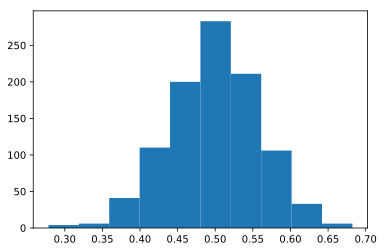

In [62]:
plt.hist(roc_aucs)

In [67]:
roc_aucs = []
for _ in range(1000):
    rand_numbers = np.random.normal(size=89)
    target = np.ones(89)
    target[:45] = 0
    roc_aucs.append(roc_auc_score(target, rand_numbers))
roc_aucs = np.array(roc_aucs)

(array([  6.,  25.,  83., 168., 237., 236., 136.,  70.,  27.,  12.]),
 array([0.31767677, 0.35444444, 0.39121212, 0.4279798 , 0.46474747,
        0.50151515, 0.53828283, 0.57505051, 0.61181818, 0.64858586,
        0.68535354]),
 <a list of 10 Patch objects>)

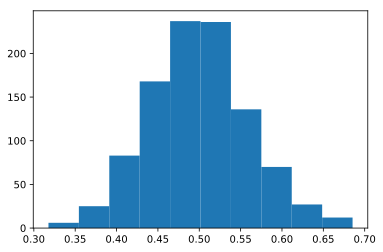

In [68]:
plt.hist(roc_aucs)